<div class="guide-section-description">
      <h6 class="guide-section-title">문제 설명</h6>
      <div class="markdown solarized-dark"><p>가로 길이가 Wcm, 세로 길이가 Hcm인 직사각형 종이가 있습니다. 종이에는 가로, 세로 방향과 평행하게 격자 형태로 선이 그어져 있으며, 모든 격자칸은 1cm x 1cm 크기입니다. 이 종이를 격자 선을 따라 1cm × 1cm의 정사각형으로 잘라 사용할 예정이었는데, 누군가가 이 종이를 대각선 꼭지점 2개를 잇는 방향으로 잘라 놓았습니다. 그러므로 현재 직사각형 종이는 크기가 같은 직각삼각형 2개로 나누어진 상태입니다. 새로운 종이를 구할 수 없는 상태이기 때문에, 이 종이에서 원래 종이의 가로, 세로 방향과 평행하게 1cm × 1cm로 잘라 사용할 수 있는 만큼만 사용하기로 하였습니다. <br>
가로의 길이 W와 세로의 길이 H가 주어질 때, 사용할 수 있는 정사각형의 개수를 구하는 solution 함수를 완성해 주세요.</p>

<h5>제한사항</h5>

<ul>
<li>W, H : 1억 이하의 자연수</li>
</ul>

<h4>입출력 예</h4>
<table>
        <thead><tr>
<th>W</th>
<th>H</th>
<th>result</th>
</tr>
</thead>
        <tbody><tr>
<td>8</td>
<td>12</td>
<td>80</td>
</tr>
</tbody>
      </table>
<h5>입출력 예 설명</h5>

<p>입출력 예 #1<br>
가로가 8, 세로가 12인 직사각형을 대각선 방향으로 자르면 총 16개 정사각형을 사용할 수 없게 됩니다. 원래 직사각형에서는 96개의 정사각형을 만들 수 있었으므로, 96 - 16 = 80 을 반환합니다.</p>

<p><img src="https://grepp-programmers.s3.amazonaws.com/files/production/ee895b2cd9/567420db-20f4-4064-afc3-af54c4a46016.png" title="" alt="572957326.92.png"></p>
</div>
    </div>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

def gcd(n, m):
    while m != 0:
        r = n % m
        n, m = m, r
    return n

def plot_wh(w, h):
    g = gcd(w, h)
    w //= g
    h //= g
    for i in range(h + 1):
        plt.plot([0, w], [i, i], c='gray')
    for i in range(w + 1):
        plt.plot([i, i], [0, h], c='gray')
    plt.plot([0, w], [0, h], c='blue')
    plt.show()

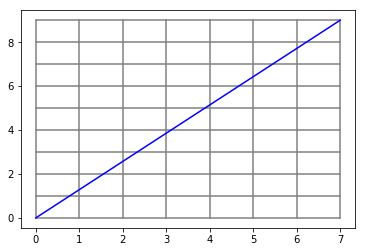

In [2]:
w = 7
h = 9
plot_wh(w,h)

In [3]:
def solution_1(w, h):
    def gcd(n, m):
        while m != 0:
            r = n % m
            n, m = m, r
        return n
    if h < w:
        h, w = w, h
    g = gcd(w, h)
    cut = 0
    b_cut = 0
    count = 0
    for x in range(1, w // g + 1):
        cut = h * x / w
        if cut % 1 == 0:
            plus = 0
        else:
            plus = 1
        cut = int(cut)
        count += cut - b_cut + plus
        b_cut = cut
    return w * h - g * count

In [4]:
def solution_2(w, h):
    def gcd(n, m):
        while m != 0:
            r = n % m
            n, m = m, r
        return n
    g = gcd(w, h)
    return w * h - w - h + g

In [5]:
import random
def make_test(n=10):
    test_case = []
    while len(test_case) < n:
        w = random.randint(1, pow(10, 8) + 1)
        h = random.randint(1, pow(10, 8) + 1)
        test_case.append((w, h))
    return test_case

In [6]:
test_case = make_test(10)

In [7]:
%timeit -n 1 -r 1 [solution_1(case[0], case[1]) for case in test_case]  # 통과
%timeit -n 1000 -r 1000 [solution_2(case[0], case[1]) for case in test_case]  # 통과

2min 24s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
21 µs ± 5.96 µs per loop (mean ± std. dev. of 1000 runs, 1000 loops each)
